In [1]:
import pandas as pd

In [2]:
data_raw = pd.read_csv("notes.csv")

Point 8 fevrier

Pour ce qui est de la description des détails de ta modélisation, tu dois expliquer ta démarche :

justification de la régression logistique (car variable cible qualitative binaire),
type de modélisation suivie (stepwise ?),
performances globales du modèle :
stats : AIC, BIC, test de l’hypothèse nulle globale (ie tous les coef estimés égaux à 0) ;
visuelles : AUC et courbe ROC, matrice de confusion et les taux qui en découlent (taux de bien classés et donc taux d’erreur, sensibilité, spécificité)
et stats au niveau des coefficients estimés (significativement différents de 0 ?)
et résidus faibles, aléatoires

Oui, pour la partie application, tu as dans le descriptif de la mission un fichier example.csv avec de nouvelles valeurs sur lesquelles appliquer le modèle et ainsi prédire la probabilité d’avoir un vrai billet.

Ce fichier est exactement au même format que celui qui te sera transmis en direct par l’évaluateur lors de la soutenance. Tu devras donc appliquer ton modèle en direct sur ce nouveau jeu de données et l’évaluateur vérifiera que les probabilités estimées ne sont pas trop éloignées de celles auxquelles il s’attend.

 

Par rapport à ton Git, la validation croisée n’est pas expressément demandée. C’est un plus si tu la fais et l’expliques, mais pas obligatoire.

Dans ton modèle, si tu ne suis pas une approche automatique (stepwise ou autre), il faut que tu retires les variables non significatives de ton modèle.

# Mission 0: description des données

In [3]:
data_raw.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
5,True,172.57,104.65,104.44,4.54,2.99,113.16
6,True,172.38,103.55,103.80,3.97,2.90,113.30
7,True,171.58,103.65,103.37,3.54,3.19,113.38
8,True,171.96,103.51,103.75,4.06,3.33,113.53
9,True,172.14,104.34,104.20,4.63,3.02,112.47


In [4]:
data_raw.shape

(170, 7)

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [6]:
data_raw.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [7]:
data_raw.describe(include=['object', 'bool'])

,is_genuine
count,170
unique,2
top,True
freq,100


In [8]:
import seaborn as sns

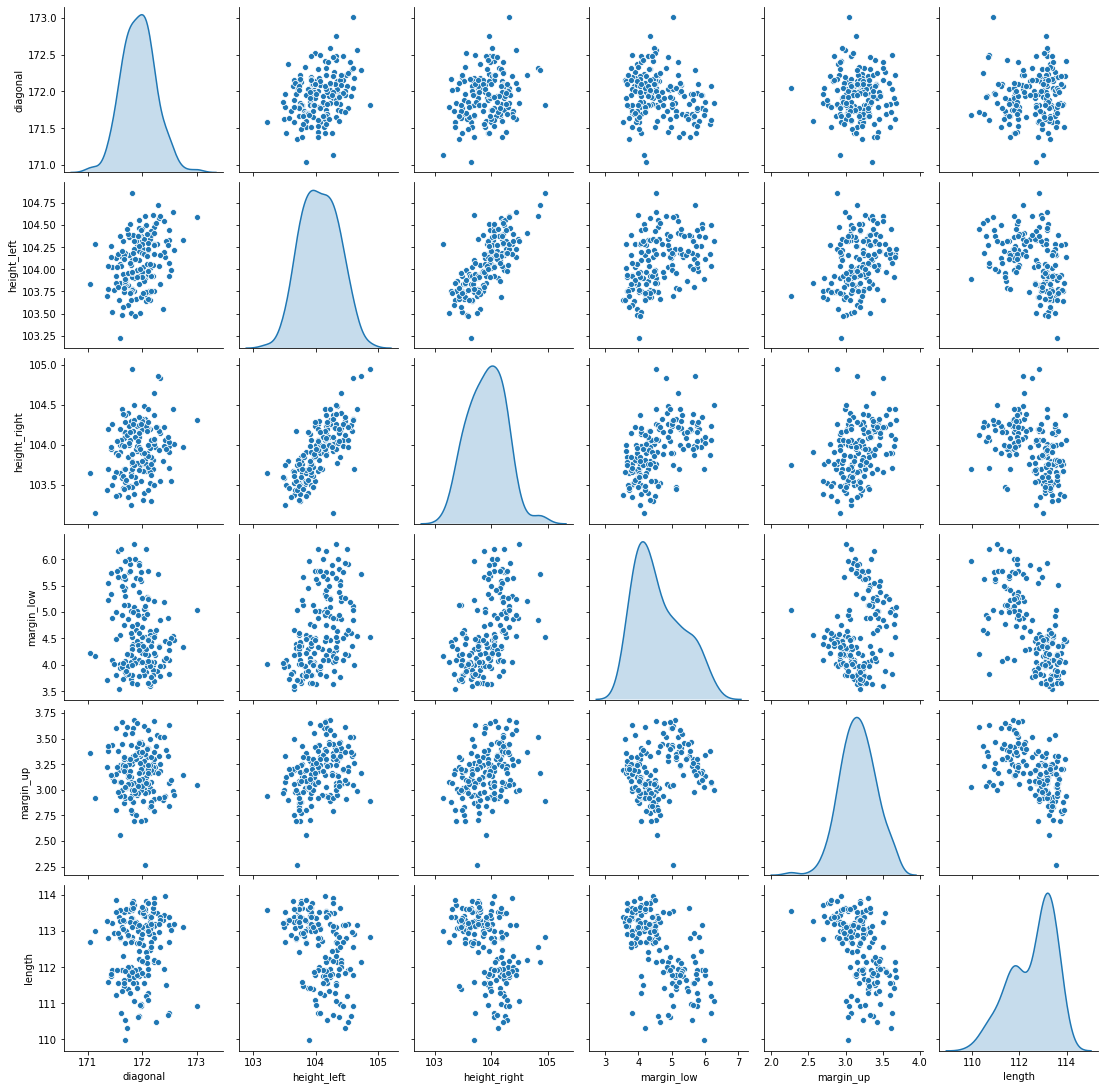

In [9]:
_ = sns.pairplot(
    data=data_raw.loc[:,"diagonal":"length"],
    kind="scatter",
    diag_kind="kde",
)

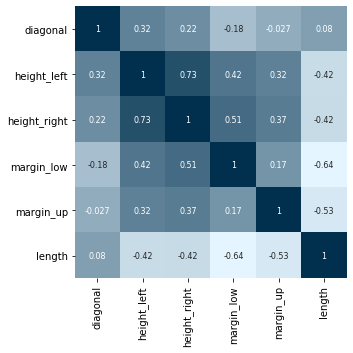

In [10]:
import matplotlib.pyplot as plt
import numpy as np

corr = data_raw.loc[:,"diagonal":"length"].corr()
_, ax = plt.subplots(figsize=(5, 5))


_ = sns.heatmap(
    corr, 
    cmap=sns.light_palette("#00304e", as_cmap=True), 
    square=True, 
    cbar=False, 
    ax=ax, 
    annot=True, 
    annot_kws={"fontsize": 8},
)

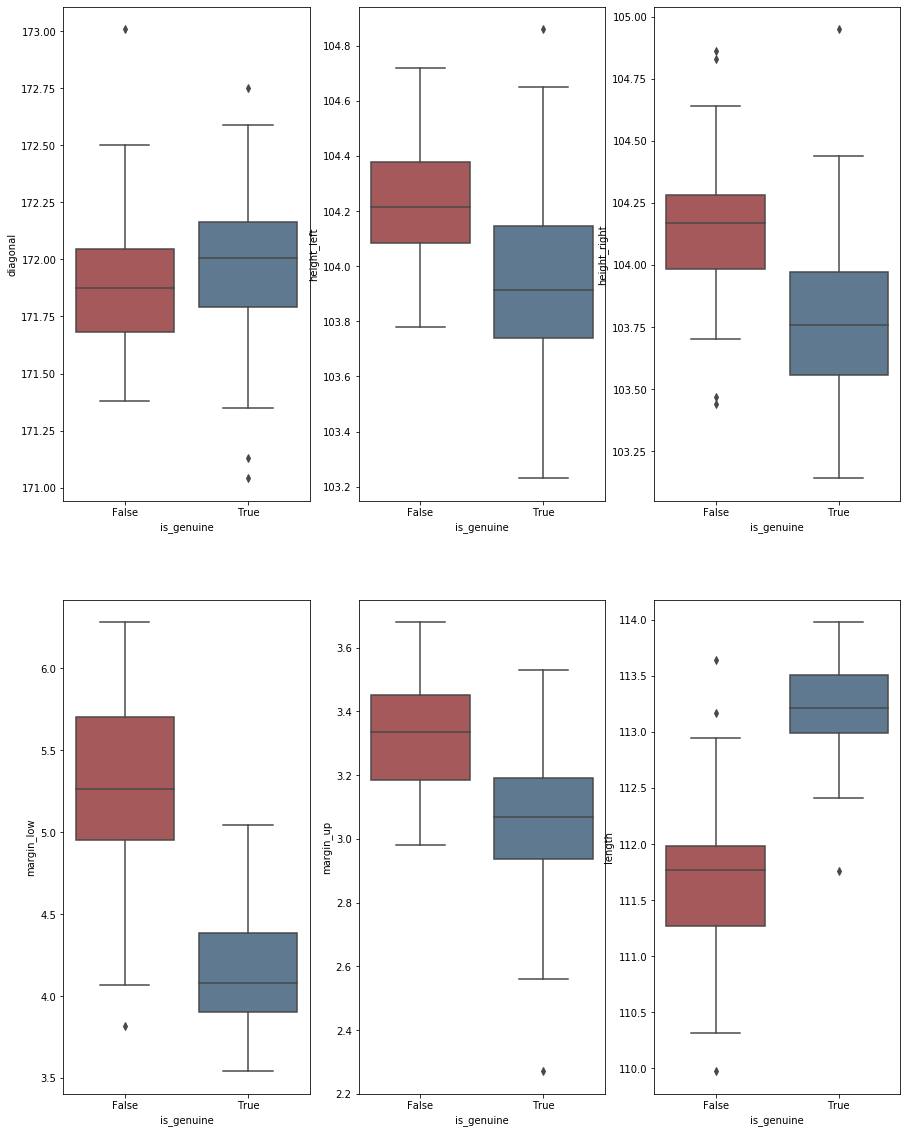

In [11]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 20))

for f, ax in zip(data_raw.loc[:,"diagonal":"length"].columns, axes.ravel()):
        _ = sns.boxplot(
        data=data_raw, 
        y=f, 
        x='is_genuine', 
        ax=ax, 
        palette=sns.color_palette("Set1", n_colors=6, desat=.5)
    )


# Mission 1: ACP

In [12]:
from sklearn import preprocessing, decomposition
from functions import *

X = data_raw.drop(columns=["is_genuine"]).values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X)

In [13]:
PDX_scaled = pd.DataFrame(X_scaled)
PDX_scaled

,0,1,2,3,4,5
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892


In [14]:
PDX_scaled.columns = ["diagonal", "height_left","height_right", "margin_low", "margin_up", "length"]

In [15]:
PDX_scaled.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02
mean,7.695805e-15,3.147286e-14,3.619588e-14,7.523394e-16,-1.504679e-15,-1.375109e-14
std,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00,1.002954e+00
min,-2.954029e+00,-2.813096e+00,-2.388197e+00,-1.531521e+00,-3.820725e+00,-2.821245e+00
25%,-6.907527e-01,-7.529355e-01,-7.215570e-01,-8.029855e-01,-6.700684e-01,-7.761662e-01
50%,1.447108e-02,-3.818593e-02,6.630909e-02,-2.315852e-01,-1.747245e-03,2.979069e-01
75%,6.458924e-01,7.438342e-01,7.329650e-01,7.362241e-01,6.771821e-01,7.779851e-01
max,3.507789e+00,2.669454e+00,3.096563e+00,2.382571e+00,2.162340e+00,1.529294e+00


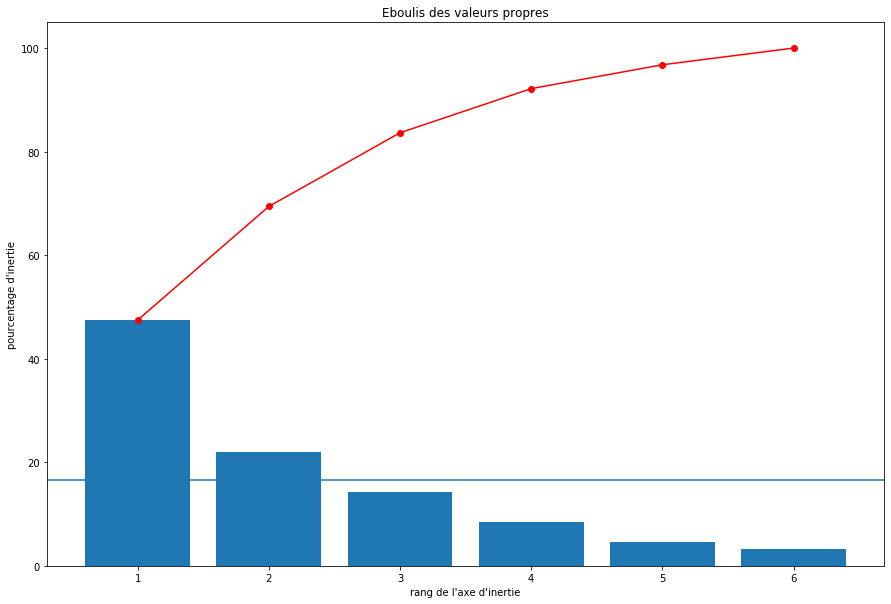

In [16]:
pca = decomposition.PCA(n_components=6)
pca.fit(X_scaled)

fig1_1 = plt.figure(figsize=(15, 10))
plt.axhline(16.6)
display_scree_plot(pca)

In [17]:
dir(pca)
pca.explained_variance_ratio_

array([0.47447921, 0.21957106, 0.14234524, 0.08526295, 0.04612822,
       0.03221331])

In [18]:
lst=pca.explained_variance_.tolist()
lst

[2.863720650321014,
 1.3252217799812753,
 0.8591251368790592,
 0.5146048137613252,
 0.27840703478426176,
 0.19442354285294342]

In [19]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values

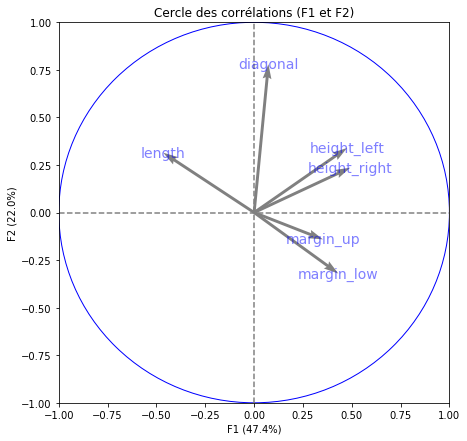

In [20]:
pcs=pca.components_
display_circles(pcs,6,pca,[(0,1)],
                labels=data_raw.loc[:,"diagonal":"length"].columns)

In [21]:
X_projected = pca.transform(X_scaled)
PDX_projected = pd.DataFrame(X_projected)
PDX_projected

,0,1,2,3,4,5
0,2.153639,1.599709,1.787451,2.433465,0.699690,-1.267702
1,-2.110416,-0.526039,0.542563,0.344550,0.067440,-0.544601
2,-1.973152,-0.048102,0.858716,0.374812,-0.424886,0.080487
3,-2.059795,-0.089105,-0.531529,0.519548,-0.033267,-0.038261
4,-2.403180,0.412170,3.319507,-0.837043,-0.420151,-0.445099
...,...,...,...,...,...,...
165,2.478626,0.189974,-0.814598,0.107861,-0.899828,0.093078
166,2.585331,2.914472,0.586789,-2.183704,0.274577,-0.509206
167,2.067245,0.845602,-0.610282,-1.714172,0.116958,-0.504338
168,0.739257,-0.972965,-1.359772,-0.191736,-0.243557,0.211429


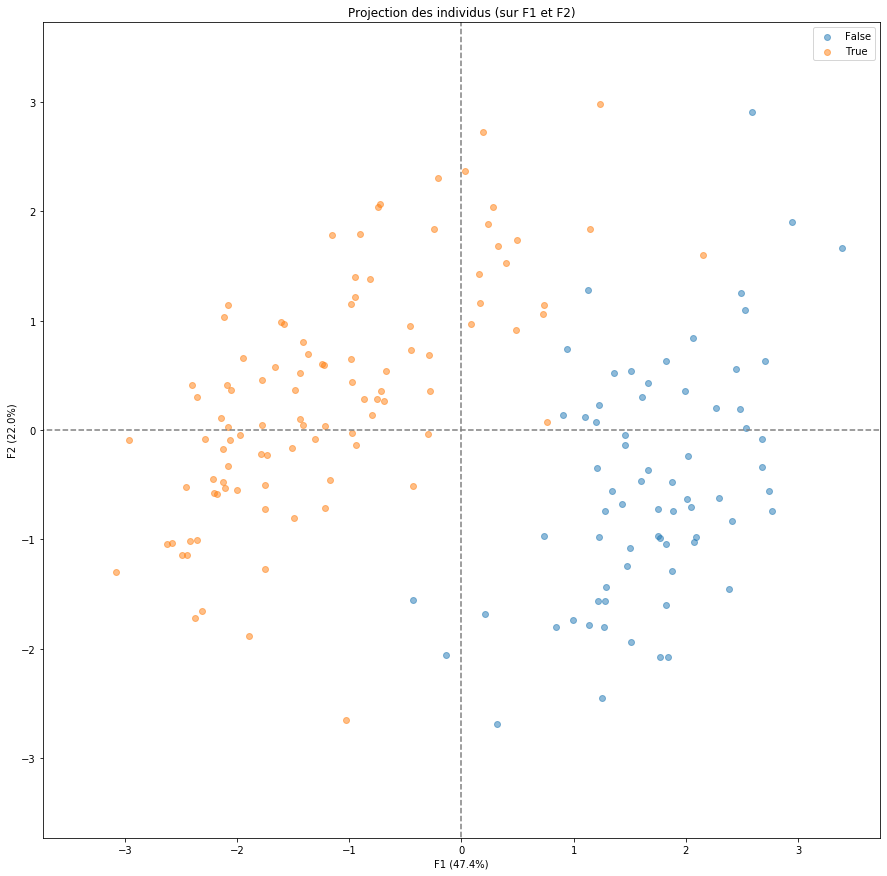

In [22]:

display_factorial_planes(X_projected, 6, pca, [(0,1)], alpha = 0.5, illustrative_var= data_raw['is_genuine'])

Pour calculer la qualité de
représentation des individus sur les axes, nous devons d’abord calculer les carrés des
distances à l’origine des individus, qui correspondent également à leur contribution dans
l’inertie totale.

la qualite de representation d'un point equivaut au carre du rapport distance a l'origine sur l'axe / distance a l'origine dans l'espace centre reduit. le point sera bien represente si le rapport est proche de 1.




In [23]:
di_1 = np.sum(X_projected**2, axis=1)
di_2 = np.sum(X_scaled**2, axis=1)

In [24]:
# on calcule les distances a l'origine, cela correspond aussi a leur contribution a l'inertie totale
di = np.sum(X_projected**2, axis=1)
di

array([18.41059773,  5.44479913,  4.96052735,  4.80571914, 18.03956654,
       11.52798451,  8.02902542,  9.34433795,  5.96163957,  2.37365021,
        6.92508658,  5.88603767,  5.57845059,  3.5044568 ,  2.77630174,
        9.07121651,  4.15309085,  5.38514092,  7.6671102 ,  2.38556352,
        4.07607735,  6.0203732 ,  4.11416571,  6.23396493,  3.62379624,
        6.15858354,  5.94010181,  3.98683368,  3.19411016, 10.11756139,
        2.94088917,  6.09251356,  1.71688508,  4.55893873,  8.37458933,
        3.51841501,  4.97705146,  5.95033666,  5.93744942, 15.05260763,
        9.97693432,  1.8297429 ,  7.16773035,  2.02462891,  8.78316767,
        8.94982931,  1.77757668,  3.95123443,  2.19892131, 12.91753759,
        4.79002473,  4.23080101,  2.45674953,  4.35876105,  7.72427349,
        6.1239637 ,  5.48012126,  7.13679973,  1.80995634,  1.48445407,
        5.69862224,  5.85175785,  5.10759065,  3.07860308,  0.81392884,
        2.21875606,  7.52176771,  6.47897254,  3.9393141 ,  2.44

In [25]:
PDdi= pd.DataFrame(di)
PDdi.describe()

,0
count,170.000000
mean,6.000000
std,3.404715
min,0.813929
25%,3.751205
50%,5.461380
75%,7.492583
max,20.625650


la contribution des points sur l'axe correspond alors a leur distance de leur projection a l'origine sur l'axe au carre / leur distance a l'origine

In [26]:
cos2 = X_projected**2
cos2

array([[4.63815987e+00, 2.55907031e+00, 3.19498033e+00, 5.92175300e+00,
        4.89565430e-01, 1.60706879e+00],
       [4.45385524e+00, 2.76716945e-01, 2.94374363e-01, 1.18714362e-01,
        4.54820714e-03, 2.96590018e-01],
       [3.89333047e+00, 2.31378154e-03, 7.37392525e-01, 1.40484270e-01,
        1.80528200e-01, 6.47810418e-03],
       ...,
       [4.27350197e+00, 7.15043491e-01, 3.72444450e-01, 2.93838459e+00,
        1.36791513e-02, 2.54356689e-01],
       [5.46500686e-01, 9.46660047e-01, 1.84898021e+00, 3.67627598e-02,
        5.93200176e-02, 4.47022820e-02],
       [2.26500220e+00, 1.16580577e+00, 3.56788833e-02, 1.81589707e+00,
        8.36073155e-02, 3.64163899e-03]])

In [27]:
pd_dict = {}
for j in range(6):
    cos2[:,j] = cos2[:,j]/di
    pd_dict.update({'Qual_F'+ str(j): cos2[:,j]})

In [28]:
qual_representation = pd.DataFrame(pd_dict)
qual_representation

,Qual_F0,Qual_F1,Qual_F2,Qual_F3,Qual_F4,Qual_F5
0,0.251929,0.139000,0.173540,0.321649,0.026592,0.087290
1,0.818002,0.050822,0.054065,0.021803,0.000835,0.054472
2,0.784862,0.000466,0.148652,0.028320,0.036393,0.001306
3,0.882856,0.001652,0.058789,0.056169,0.000230,0.000305
4,0.320145,0.009417,0.610831,0.038839,0.009786,0.010982
...,...,...,...,...,...,...
165,0.800651,0.004703,0.086479,0.001516,0.105521,0.001129
166,0.324059,0.411824,0.016694,0.231196,0.003655,0.012571
167,0.498809,0.083461,0.043472,0.342972,0.001597,0.029689
168,0.156908,0.271800,0.530870,0.010555,0.017032,0.012835


In [29]:
print(np.sum(cos2,axis=1)) # Variance a 1 des donnees centrees reduites

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [30]:
# cos2.shape

In [31]:
# poids de chaque axe par rapport a l'inertie totale / contribution des axes  C'est l'inertie projetée du nuage NI
pca.explained_variance_

array([2.86372065, 1.32522178, 0.85912514, 0.51460481, 0.27840703,
       0.19442354])

In [32]:
#contributions aux axes
ctr = X_projected**2
for j in range(6):
    ctr[:,j] = ctr[:,j]/(X_projected.shape[0] * pca.explained_variance_[j])

In [33]:
ctr_sur_axe = pd.DataFrame({'CTR_1': ctr[:,0], 'CTR_2': ctr[:,1]})
ctr_sur_axe

,CTR_1,CTR_2
0,0.009527,0.011359
1,0.009149,0.001228
2,0.007997,0.000010
3,0.008715,0.000035
4,0.011863,0.000754
...,...,...
165,0.012620,0.000160
166,0.013729,0.037704
167,0.008778,0.003174
168,0.001123,0.004202


In [34]:
ctr_sur_axe.sum() # somme des contributions a 1 sur chaque axe

CTR_1    0.994118
CTR_2    0.994118
dtype: float64

# Mission 2: Classification

In [35]:
from sklearn.cluster import KMeans
km=KMeans(2)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
data_raw["Cluster"]= km.labels_

In [37]:
data_raw

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.67,103.74,103.70,4.01,2.87,113.29,0
2,True,171.83,103.76,103.76,4.40,2.88,113.84,0
3,True,171.80,103.78,103.65,3.73,3.12,113.63,0
4,True,172.05,103.70,103.75,5.04,2.27,113.55,0
...,...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78,1
166,False,173.01,104.59,104.31,5.04,3.05,110.91,1
167,False,172.47,104.27,104.10,4.88,3.33,110.68,1
168,False,171.82,103.97,103.88,4.73,3.55,111.87,1


In [38]:
extract = data_raw.loc[:, ["Cluster", "is_genuine"]]
extract

,Cluster,is_genuine
0,1,True
1,0,True
2,0,True
3,0,True
4,0,True
...,...,...
165,1,False
166,1,False
167,1,False
168,1,False


In [39]:
extract.pivot_table(index='Cluster', columns='is_genuine', aggfunc=lambda x: len(x))

is_genuine,False,True
Cluster,,
0,1,93
1,69,7


On voit que 99% des points dans le cluster 0 sont vrais. La classification via Kmeans est concluante.

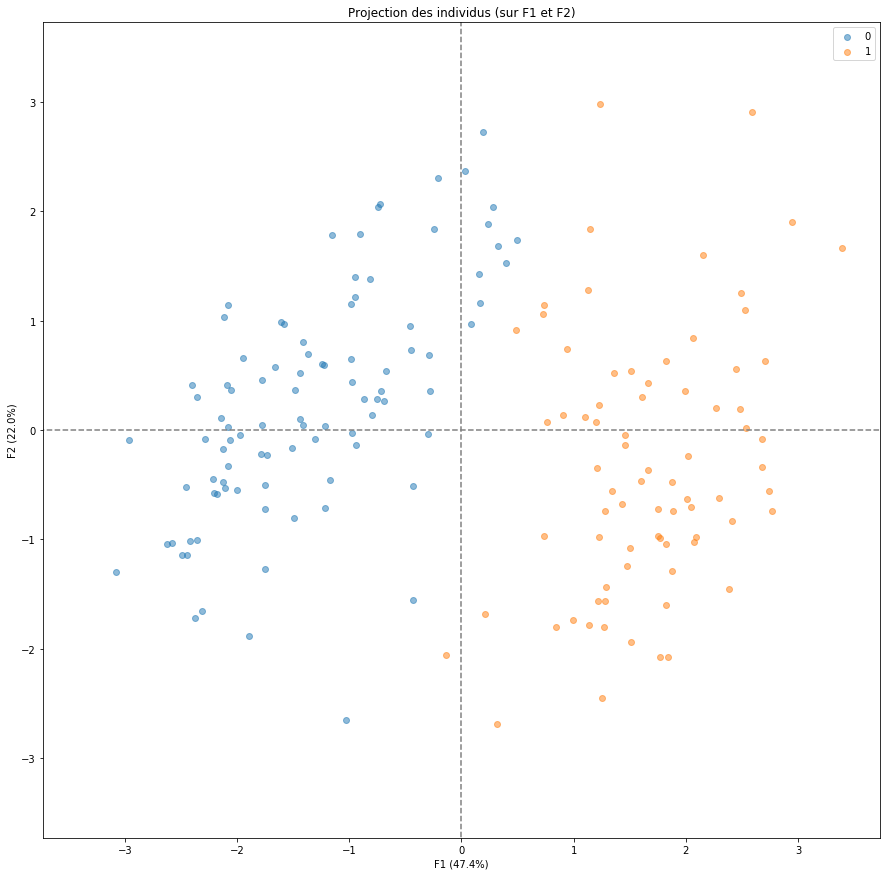

In [40]:
display_factorial_planes(X_projected, 6, pca, [(0,1)], alpha = 0.5, illustrative_var= data_raw['Cluster'])

# Mission 3: Regression


In [41]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression


In [42]:
y = data_raw.is_genuine
y

0       True
1       True
2       True
3       True
4       True
       ...  
165    False
166    False
167    False
168    False
169    False
Name: is_genuine, Length: 170, dtype: bool

In [43]:
ybin = 1*y
PDybin = pd.DataFrame(ybin)
PDybin

,is_genuine
0,1
1,1
2,1
3,1
4,1
...,...
165,0
166,0
167,0
168,0


In [44]:
x = data_raw.loc[:,"margin_low":"length"]
x

,margin_low,margin_up,length
0,4.52,2.89,112.83
1,4.01,2.87,113.29
2,4.40,2.88,113.84
3,3.73,3.12,113.63
4,5.04,2.27,113.55
...,...,...,...
165,5.24,3.58,111.78
166,5.04,3.05,110.91
167,4.88,3.33,110.68
168,4.73,3.55,111.87


In [45]:
x_scaled = X_scaled
x_scaled = x_scaled[:, 3:]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=0)
X_train.shape

(136, 3)

In [47]:
X_test.shape

(34, 3)

In [48]:
logreg = LogisticRegression(penalty='none',solver='newton-cg')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
pd.DataFrame(np.concatenate([logreg.intercept_.reshape(-1,1),
                             logreg.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x.columns)).T

,coef
constante,11.912375
margin_low,-57.826106
margin_up,-31.111801
length,26.965724


In [50]:
logreg.coef_

array([[-57.8261061 , -31.11180115,  26.96572401]])

In [51]:
logreg.score(X_test, y_test)

1.0

In [52]:
y_pred = logreg.predict(X_test)
y_pred

array([False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True])

In [53]:
y_proba = logreg.predict_proba(X_test)
with np.printoptions(precision=0, suppress=True):
    print(y_proba[:,1] * 100)

[  0.   0.   0. 100. 100.   0. 100. 100.   0. 100.   0. 100. 100.   0.
 100. 100. 100.   0. 100. 100.   0. 100.   0.   0.   0. 100. 100.   0.
 100. 100. 100.   0. 100. 100.]


In [54]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14,  0],
       [ 0, 20]])

Text(0.5, 257.44, 'Predicted label')

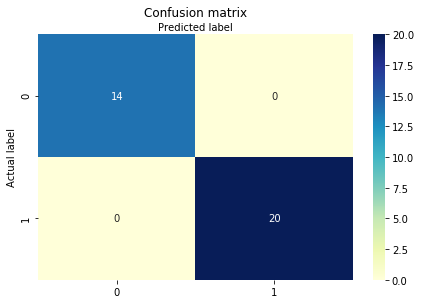

In [55]:
class_names=["Faux","Vrai"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) # sensibilite

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


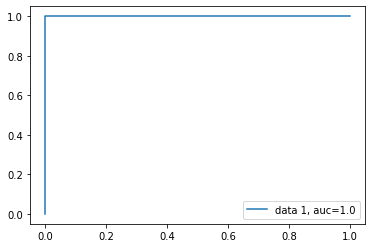

In [57]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [58]:
x_test = pd.read_csv('example.csv')
x_test = x_test.drop(['id'], axis=1)
x_test
x_test_scaled=std_scale.transform(x_test)
x_test_scaled = x_test_scaled[:, 3:]

In [59]:
y_pred_proba = logreg.predict_proba(x_test_scaled)[::,1]
y_pred_proba

array([4.76534862e-39, 1.88998402e-59, 2.07154649e-34, 1.00000000e+00,
       1.00000000e+00])

## Validation croisee

In [60]:
lr = LogisticRegression()

In [61]:
model_all = lr.fit(x,y)

In [62]:
print(model_all.coef_,model_all.intercept_)

[[-2.97077903 -1.48784376  2.48379203]] [-260.6237096]


In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
succes = cross_val_score(lr,x,y,cv=6,scoring='accuracy') # cv cross validation

In [65]:
print(succes)

[0.96551724 0.96551724 1.         1.         0.96428571 1.        ]


In [66]:
print(succes.mean())

0.9825533661740559


## Statsmodel

Stepwise, sortir et tester les variables au fur et a mesure
Les donnees ici sont centrees reduites.

In [67]:
# Dataframe initial pour la methode stepwise
PDX_scaled 

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892


In [68]:
x_scaled = PDX_scaled.values
x_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [69]:
X

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.67, 103.74, 103.7 ,   4.01,   2.87, 113.29],
       [171.83, 103.76, 103.76,   4.4 ,   2.88, 113.84],
       ...,
       [172.47, 104.27, 104.1 ,   4.88,   3.33, 110.68],
       [171.82, 103.97, 103.88,   4.73,   3.55, 111.87],
       [171.96, 104.  , 103.95,   5.63,   3.26, 110.96]])

In [70]:
# ajout d'une colonne de 1 pour le calcul de la constante
x_stat = sm.add_constant(X)
mod = sm.GLM(y,x_stat)
res = mod.fit()

In [71]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -111.4893
Link Function:      identity         BIC:            -832.3775
Dependent Variable: is_genuine       Log-Likelihood: 62.745   
Date:               2020-03-17 11:44 LL-Null:        -561.20  
No. Observations:   170              Deviance:       4.7576   
Df Model:           6                Pearson chi2:   4.76     
Df Residuals:       163              Scale:          0.029188 
Method:             IRLS                                      
---------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
---------------------------------------------------------------
const   -14.0754    8.4586   -1.6640  0.0961  -30.6539   2.5030
x1        0.0179    0.0498    0.3598  0.7190   -0.0798   0.1156
x2        0.0768    0.0692    1.1094  0.2673   -0.0589   0.2124
x3       -0.1083    0.0643   -1.6858  0.0918   -0.2343   0.0176
x4       -0.3716    0.0293  -12.6720  0.0000   -0.4291  -0.3141
x5       -0.6628    0.0718   -9.2246  0.0000   -0.8036  -0.5219
x6        0.1658    0.0223    7.4243  0.0000    0.1220   0.2096
==============================================================

"""

In [72]:
# Retrait de la diagonale
PDX_scaled2 = PDX_scaled.loc[:, 'height_left':'length']
x_scaled = PDX_scaled2.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -113.3543
Link Function:      identity         BIC:            -837.5095
Dependent Variable: is_genuine       Log-Likelihood: 62.677   
Date:               2020-03-17 11:44 LL-Null:        -564.51  
No. Observations:   170              Deviance:       4.7614   
Df Model:           5                Pearson chi2:   4.76     
Df Residuals:       164              Scale:          0.029033 
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const      0.5882    0.0131   45.0122  0.0000   0.5626   0.6138
x1         0.0250    0.0196    1.2765  0.2018  -0.0134   0.0634
x2        -0.0346    0.0209   -1.6554  0.0978  -0.0756   0.0064
x3        -0.2626    0.0193  -13.6345  0.0000  -0.3004  -0.2249
x4        -0.1572    0.0167   -9.4346  0.0000  -0.1898  -0.1245
x5         0.1525    0.0205    7.4357  0.0000   0.1123   0.1927
==============================================================

"""

In [73]:
PDX_scaled.loc[:, ['diagonal', 'height_right', 'margin_low', 'margin_up', 'length']]

,diagonal,height_right,margin_low,margin_up,length
0,-0.428344,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...
165,0.555689,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.145809,0.168395,1.610710,-0.759892


In [74]:
# Retrait de la height_left
PDX_scaled3 = PDX_scaled.loc[:, ['diagonal', 'height_right', 'margin_low', 'margin_up', 'length']]
x_scaled = PDX_scaled3.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -112.2105
Link Function:      identity         BIC:            -837.4774
Dependent Variable: is_genuine       Log-Likelihood: 62.105   
Date:               2020-03-17 11:44 LL-Null:        -560.33  
No. Observations:   170              Deviance:       4.7935   
Df Model:           5                Pearson chi2:   4.79     
Df Residuals:       164              Scale:          0.029229 
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const      0.5882    0.0131   44.8610  0.0000   0.5625   0.6139
x1         0.0105    0.0145    0.7203  0.4714  -0.0180   0.0389
x2        -0.0226    0.0176   -1.2841  0.1991  -0.0570   0.0119
x3        -0.2582    0.0205  -12.6145  0.0000  -0.2983  -0.2181
x4        -0.1553    0.0169   -9.1752  0.0000  -0.1885  -0.1221
x5         0.1500    0.0204    7.3384  0.0000   0.1099   0.1901
==============================================================

"""

In [75]:
# Retrait de la height_left
PDX_scaled3 = PDX_scaled.loc[:, ['diagonal', 'height_left', 'margin_low', 'margin_up', 'length']]
x_scaled = PDX_scaled3.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -110.5507
Link Function:      identity         BIC:            -837.4304
Dependent Variable: is_genuine       Log-Likelihood: 61.275   
Date:               2020-03-17 11:44 LL-Null:        -554.31  
No. Observations:   170              Deviance:       4.8406   
Df Model:           5                Pearson chi2:   4.84     
Df Residuals:       164              Scale:          0.029516 
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const      0.5882    0.0132   44.6425  0.0000   0.5624   0.6141
x1         0.0017    0.0151    0.1144  0.9089  -0.0279   0.0314
x2         0.0034    0.0171    0.1988  0.8424  -0.0302   0.0370
x3        -0.2725    0.0193  -14.1369  0.0000  -0.3103  -0.2347
x4        -0.1634    0.0165   -9.9243  0.0000  -0.1957  -0.1312
x5         0.1481    0.0205    7.2230  0.0000   0.1079   0.1883
==============================================================

"""

In [76]:
# Retrait de la diagonale
PDX_scaled4 = PDX_scaled.loc[:, 'height_right':'length']
x_scaled = PDX_scaled4.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -113.6736
Link Function:      identity         BIC:            -842.5980
Dependent Variable: is_genuine       Log-Likelihood: 61.837   
Date:               2020-03-17 11:44 LL-Null:        -562.14  
No. Observations:   170              Deviance:       4.8087   
Df Model:           4                Pearson chi2:   4.81     
Df Residuals:       165              Scale:          0.029144 
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const      0.5882    0.0131   44.9266  0.0000   0.5626   0.6139
x1        -0.0176    0.0161   -1.0900  0.2757  -0.0492   0.0140
x2        -0.2631    0.0193  -13.6324  0.0000  -0.3009  -0.2252
x3        -0.1572    0.0167   -9.4168  0.0000  -0.1899  -0.1245
x4         0.1488    0.0203    7.3149  0.0000   0.1089   0.1887
==============================================================

"""

In [77]:
PDX_scaled4 = PDX_scaled.loc[:, 'margin_low':'length']
x_scaled = PDX_scaled4.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -114.4539
Link Function:      identity         BIC:            -847.6992
Dependent Variable: is_genuine       Log-Likelihood: 61.227   
Date:               2020-03-17 11:44 LL-Null:        -561.44  
No. Observations:   170              Deviance:       4.8433   
Df Model:           3                Pearson chi2:   4.84     
Df Residuals:       166              Scale:          0.029177 
Method:             IRLS                                      
---------------------------------------------------------------
           Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
---------------------------------------------------------------
const      0.5882    0.0131   44.9011  0.0000   0.5626   0.6139
x1        -0.2718    0.0176  -15.4821  0.0000  -0.3062  -0.2374
x2        -0.1628    0.0159  -10.2367  0.0000  -0.1939  -0.1316
x3         0.1477    0.0203    7.2634  0.0000   0.1078   0.1875
==============================================================

"""

La conservation des variables diagonale, height_left, height_right dans le modele donnent des coefficients quasi nuls et peu significatifs.
Aussi, on ne conserve que les variables de marge et longueur dans le modele.

In [78]:
X.shape

(170, 6)

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
PDX = pd.DataFrame(X_train)
PDX.columns = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
PDX

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.51,104.13,103.90,4.99,3.60,111.23
1,171.86,103.47,103.59,4.04,2.97,113.22
2,172.10,103.98,103.86,4.47,3.06,113.00
3,171.67,103.79,103.44,5.13,3.32,111.47
4,172.10,103.98,104.28,5.78,3.16,111.09
...,...,...,...,...,...,...
131,172.14,104.34,104.20,4.63,3.02,112.47
132,172.04,104.34,104.48,4.88,3.28,112.15
133,171.79,103.74,103.48,4.60,2.80,113.35
134,171.75,104.36,104.02,6.00,3.13,111.79


In [92]:
PDX1 = PDX.loc[:, 'diagonal':'length']
x_scaled = PDX1.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y_train,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -83.3992 
Link Function:      identity         BIC:            -629.8417
Dependent Variable: is_genuine       Log-Likelihood: 48.700   
Date:               2020-03-17 12:02 LL-Null:        -432.98  
No. Observations:   136              Deviance:       3.8908   
Df Model:           6                Pearson chi2:   3.89     
Df Residuals:       129              Scale:          0.030161 
Method:             IRLS                                      
---------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
---------------------------------------------------------------
const   -10.2671    9.8731   -1.0399  0.2984  -29.6180   9.0838
x1        0.0034    0.0561    0.0608  0.9515   -0.1064   0.1133
x2        0.0691    0.0771    0.8962  0.3702   -0.0820   0.2203
x3       -0.1112    0.0716   -1.5514  0.1208   -0.2516   0.0293
x4       -0.3706    0.0324  -11.4535  0.0000   -0.4341  -0.3072
x5       -0.6799    0.0858   -7.9273  0.0000   -0.8480  -0.5118
x6        0.1643    0.0246    6.6779  0.0000    0.1160   0.2125
==============================================================

"""

In [93]:
PDX2 = PDX.loc[:, 'height_left':'length']
x_scaled = PDX2.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y_train,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -85.3953 
Link Function:      identity         BIC:            -634.7543
Dependent Variable: is_genuine       Log-Likelihood: 48.698   
Date:               2020-03-17 12:02 LL-Null:        -436.68  
No. Observations:   136              Deviance:       3.8909   
Df Model:           5                Pearson chi2:   3.89     
Df Residuals:       130              Scale:          0.029930 
Method:             IRLS                                      
---------------------------------------------------------------
          Coef.   Std.Err.     z      P>|z|    [0.025    0.975]
---------------------------------------------------------------
const    -9.8677    7.3455   -1.3434  0.1792  -24.2647   4.5293
x1        0.0703    0.0741    0.9493  0.3425   -0.0749   0.2156
x2       -0.1104    0.0703   -1.5712  0.1161   -0.2481   0.0273
x3       -0.3714    0.0300  -12.3656  0.0000   -0.4302  -0.3125
x4       -0.6808    0.0841   -8.0941  0.0000   -0.8456  -0.5159
x5        0.1641    0.0244    6.7261  0.0000    0.1163   0.2119
==============================================================

"""

In [94]:
PDX3 = PDX.loc[:, 'height_right':'length']
x_scaled = PDX3.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y_train,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -86.4559 
Link Function:      identity         BIC:            -639.6399
Dependent Variable: is_genuine       Log-Likelihood: 48.228   
Date:               2020-03-17 12:02 LL-Null:        -437.04  
No. Observations:   136              Deviance:       3.9179   
Df Model:           4                Pearson chi2:   3.92     
Df Residuals:       131              Scale:          0.029907 
Method:             IRLS                                      
---------------------------------------------------------------
          Coef.   Std.Err.     z      P>|z|    [0.025    0.975]
---------------------------------------------------------------
const    -6.3900    6.3643   -1.0040  0.3154  -18.8639   6.0838
x1       -0.0709    0.0566   -1.2528  0.2103   -0.1818   0.0400
x2       -0.3705    0.0300  -12.3481  0.0000   -0.4293  -0.3117
x3       -0.6761    0.0839   -8.0552  0.0000   -0.8406  -0.5116
x4        0.1616    0.0243    6.6653  0.0000    0.1141   0.2092
==============================================================

"""

In [125]:
PDX4 = PDX.loc[:, 'margin_low':'length']
x_scaled = PDX4.values
x_stat = sm.add_constant(x_scaled)
mod = sm.GLM(y_train,x_stat)
res = mod.fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
==============================================================
Model:              GLM              AIC:            -86.8363 
Link Function:      identity         BIC:            -644.5057
Dependent Variable: is_genuine       Log-Likelihood: 47.418   
Date:               2020-03-17 13:08 LL-Null:        -434.97  
No. Observations:   136              Deviance:       3.9648   
Df Model:           3                Pearson chi2:   3.96     
Df Residuals:       132              Scale:          0.030036 
Method:             IRLS                                      
---------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
---------------------------------------------------------------
const   -13.4533    2.9586   -4.5472  0.0000  -19.2520  -7.6546
x1       -0.3851    0.0277  -13.8984  0.0000   -0.4394  -0.3308
x2       -0.7102    0.0796   -8.9255  0.0000   -0.8661  -0.5542
x3        0.1605    0.0243    6.6080  0.0000    0.1129   0.2081
==============================================================

"""

In [126]:
PDX_test = pd.DataFrame(X_test)
PDX_test.columns = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
x_test = PDX_test.loc[:, "margin_low":"length"]
x_test = x_test.values
x_test = sm.add_constant(x_test)
x_test

array([[  1.  ,   5.31,   3.54, 111.89],
       [  1.  ,   5.46,   3.31, 111.42],
       [  1.  ,   4.73,   3.55, 111.87],
       [  1.  ,   3.95,   3.  , 113.1 ],
       [  1.  ,   4.5 ,   3.1 , 113.03],
       [  1.  ,   5.66,   2.98, 112.95],
       [  1.  ,   3.54,   3.19, 113.38],
       [  1.  ,   4.53,   3.04, 112.93],
       [  1.  ,   6.19,   3.07, 111.21],
       [  1.  ,   4.01,   3.09, 112.95],
       [  1.  ,   5.14,   3.3 , 111.4 ],
       [  1.  ,   4.54,   2.99, 113.16],
       [  1.  ,   3.97,   3.24, 113.07],
       [  1.  ,   5.2 ,   3.37, 112.2 ],
       [  1.  ,   4.56,   2.83, 113.43],
       [  1.  ,   3.6 ,   3.5 , 113.24],
       [  1.  ,   3.69,   3.17, 113.14],
       [  1.  ,   5.59,   3.47, 110.98],
       [  1.  ,   4.19,   2.98, 113.09],
       [  1.  ,   4.03,   3.25, 113.06],
       [  1.  ,   6.19,   3.08, 110.73],
       [  1.  ,   5.04,   2.27, 113.55],
       [  1.  ,   4.52,   3.67, 112.13],
       [  1.  ,   4.95,   3.04, 110.61],
       [  1.  , 

In [127]:
result = res.predict(x_test)
result_list = result.tolist()
result_list = [ True if x > 0.5 else False for x in result_list]
result_list

[False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True]

In [128]:
cnf_matrix_2 = metrics.confusion_matrix(y_test, result_list)
cnf_matrix_2

array([[14,  0],
       [ 0, 20]])

# Jeu de test

In [129]:
x_test = pd.read_csv('example.csv')
x_test = x_test.drop(['id'], axis=1)
x_test = x_test.loc[:, "margin_low":"length"]
x_test = x_test.values
x_test = sm.add_constant(x_test)
x_test

array([[  1.  ,   5.21,   3.3 , 111.42],
       [  1.  ,   6.  ,   3.31, 112.09],
       [  1.  ,   4.99,   3.39, 111.57],
       [  1.  ,   4.44,   3.03, 113.2 ],
       [  1.  ,   3.77,   3.16, 113.33]])

In [130]:
res.predict(x_test)

array([ 0.07743066, -0.12640588,  0.12231543,  0.85139708,  1.03797577])

## Alternative model

In [87]:
PDX_scaled['genuine'] = y * 1
PDX_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length,genuine
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,1
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,1
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,1
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,1
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,1
...,...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535,0
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418,0
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950,0
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892,0
